## CALL CENTER DATA ANALYSIS USING ARIMA

the data being looked at in this analysis are the month to month call ceneter data for various industries.

the process of looking at these data is as follows:
1) perform EDA
2) check for white noise
3) check for random walk
4) perform staionarity tests
5) seasonality analysis
6) ARIMA model
7) ARIMAX model
8) SARIMAX model

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
sns.set_theme(style="darkgrid")
import scipy.stats
from random import seed
from random import random
from matplotlib import pyplot
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2

## EDA

In [2]:
# get the data and take a peak at the data
data = pd.read_excel("../data/CallCenterData.xlsx")
data.head()


,month,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
0,2010-01-31,631,8,6,2,19,1,4
1,2010-02-28,633,9,7,3,27,1,3
2,2010-03-31,766,4,4,2,24,1,1
3,2010-04-30,768,12,6,3,32,1,1
4,2010-05-31,1003,2,7,2,42,1,4


In [3]:
data.describe()  # some basic information about the data

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,9856.704545,2411.856061,514.204545,112.454545,651.681818,2.250000,2.537879
std,6221.071304,1714.759241,392.882978,69.680773,395.949633,1.867255,1.161766
min,631.000000,2.000000,4.000000,2.000000,19.000000,0.000000,1.000000
25%,3744.250000,608.750000,119.000000,39.750000,363.500000,1.000000,1.000000
50%,9651.500000,2613.500000,486.000000,130.500000,581.000000,2.000000,3.000000
75%,15590.750000,4000.500000,901.500000,171.250000,997.750000,3.000000,4.000000
max,23602.000000,5138.000000,1310.000000,229.000000,1535.000000,11.000000,4.000000


In [4]:
data.isna().sum()  # check for null values

month            0
Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
dtype: int64

In [5]:
# no null values

In [6]:
# taken as a date time field

#data.month.describe(datetime_is_numeric=True)
# taken as a date time field
data.month.describe()

C:\Users\ppwid\AppData\Local\Temp\ipykernel_56852\1105270220.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.month.describe()


count                     132
unique                    132
top       2010-01-31 00:00:00
freq                        1
first     2010-01-31 00:00:00
last      2020-12-31 00:00:00
Name: month, dtype: object

In [7]:
# about 11 years of data

# set month as the index parameter instead
data.set_index("month", inplace=True)

In [8]:
data.head()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
month,,,,,,,
2010-01-31,631,8,6,2,19,1,4
2010-02-28,633,9,7,3,27,1,3
2010-03-31,766,4,4,2,24,1,1
2010-04-30,768,12,6,3,32,1,1
2010-05-31,1003,2,7,2,42,1,4


In [12]:
# setting the frequency as monthly
data = data.asfreq('M')
data

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
month,,,,,,,
2010-01-31,631,8,6,2,19,1,4
2010-02-28,633,9,7,3,27,1,3
2010-03-31,766,4,4,2,24,1,1
2010-04-30,768,12,6,3,32,1,1
2010-05-31,1003,2,7,2,42,1,4
...,...,...,...,...,...,...,...
2020-08-31,20257,4486,1111,212,371,4,3
2020-09-30,19207,4474,1020,135,362,3,1
2020-10-31,23414,5138,1310,188,523,3,4


In [13]:
# checking for teh null values
data.isna().sum()

Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
dtype: int64

### visualization of each indisutries time series

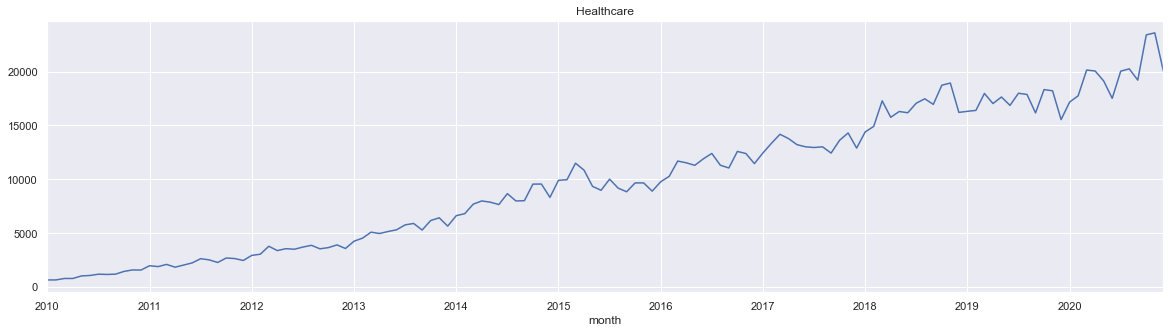

In [30]:
# check for viz for healthcare feature
ax = data.Healthcare.plot(figsize=(20,5), title="Healthcare")
fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig("../plots/plot001.png")



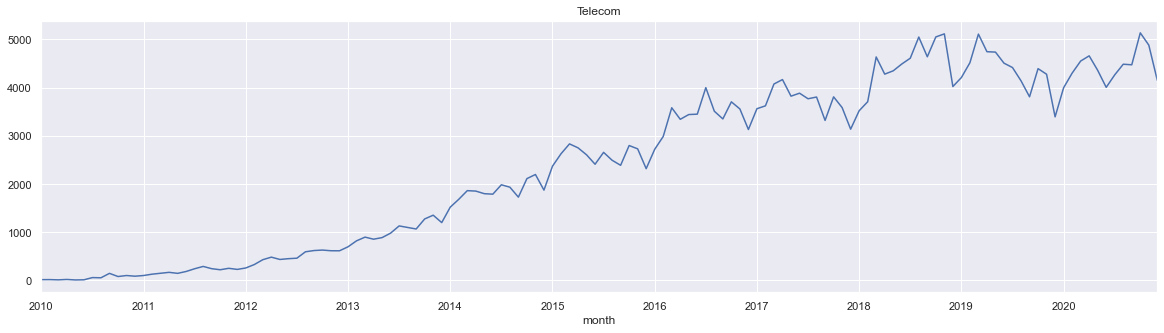

In [31]:
# check for viz for healthcare feature
ax = data.Telecom.plot(figsize=(20,5), title="Telecom")
fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig("../plots/plot002.png")


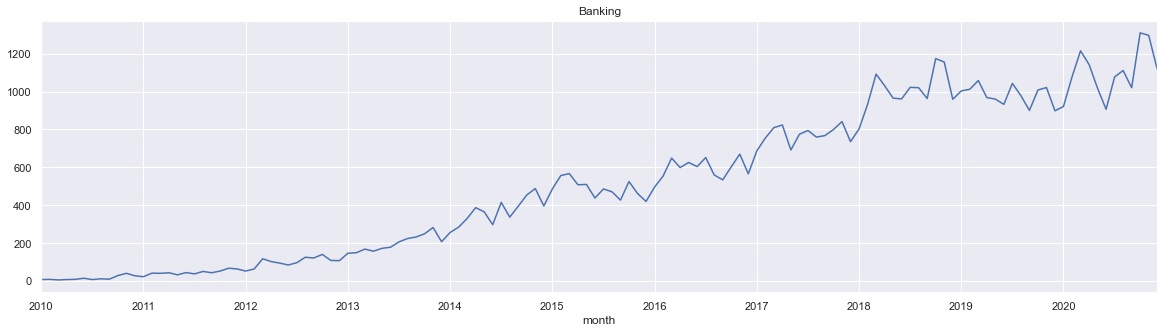

In [32]:
# check for viz for healthcare feature
ax = data.Banking.plot(figsize=(20,5), title="Banking")
fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig("../plots/plot003.png")


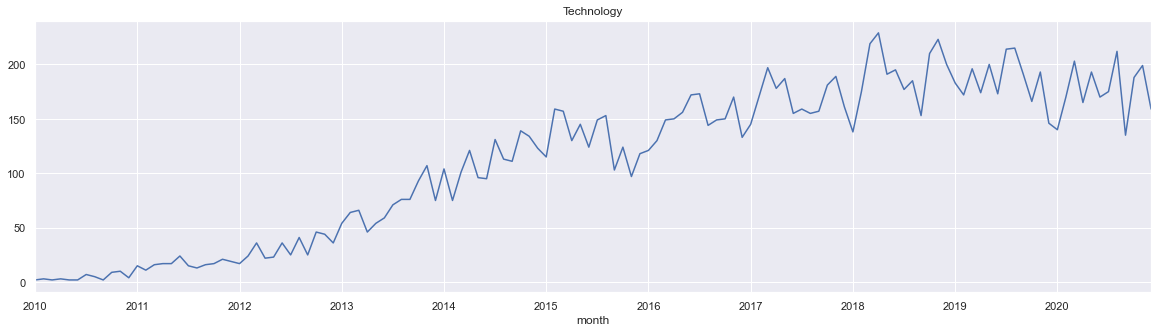

In [34]:
# check for viz for healthcare feature
ax = data.Technology.plot(figsize=(20,5), title="Technology")
fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig("../plots/plot004.png")


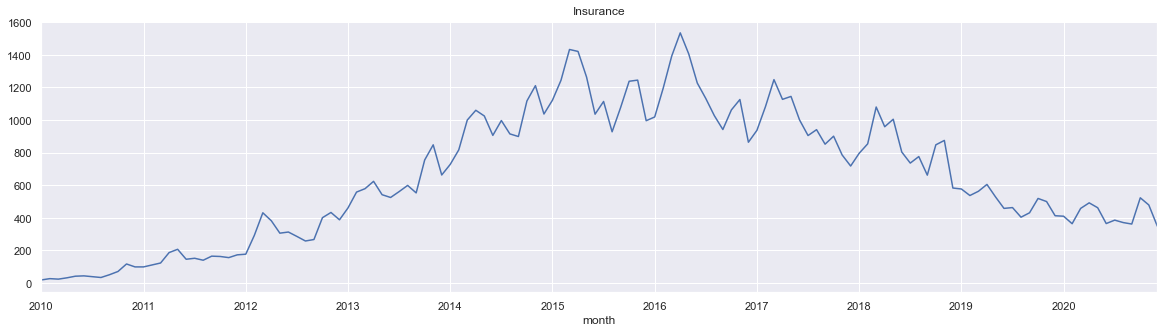

In [35]:
# check for viz for healthcare feature
ax = data.Insurance.plot(figsize=(20,5), title="Insurance")
fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig("../plots/plot004.png")


## White Noise check on the time series

(zero mean, constant variance and zero correlation)

In [ ]:
# checking [healthcare] for white noise check
# mean: just by looking at the plot and the data from the 'describe' method we can see that the mean is not zero -> PASS
# mean change over time: just by looking at the plot and the data from it is apparent that the mean does change over time -> PASS
# variance:
# correlation:

In [39]:
# generating a white noise data for the Healthcare attribute -> what the data for healthcare would look similar to if it were in fact white noise

wn = np.random.normal(loc=data.Healthcare.mean(), scale=data.Healthcare.std(), size=len(data))
data["wn"] = wn
data.wn.describe()

count      132.000000
mean     10535.223477
std       6371.520670
min      -2884.030716
25%       6074.702043
50%      10687.903144
75%      14767.968062
max      29944.157287
Name: wn, dtype: float64

In [41]:
# in looking at the describe of the white noise the mean not changing is apparent when looking at the quantiles

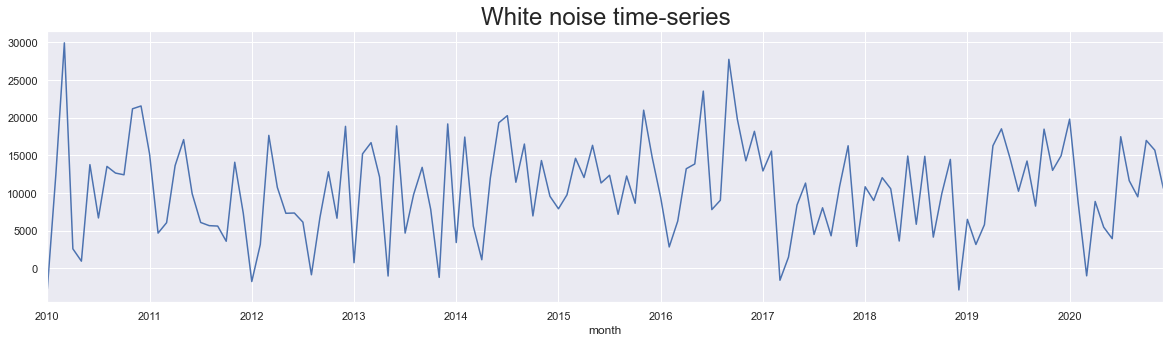

In [40]:
# white noise plot
ax = data.wn.plot(figsize=(20,5))
plt.title("White noise time-series", size=24)
#plt.show()


fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig("../plots/plot005.png")


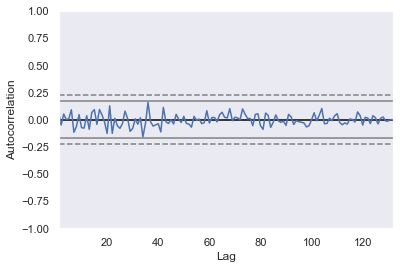

In [44]:
# check for autocorrelation plot
ax = autocorrelation_plot(data.wn)
# plt.show()

fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig("../plots/plot006.png")

In [ ]:
# in looking at the chart of white noise we can see that the data bounces back and forth across zero (no correlation)

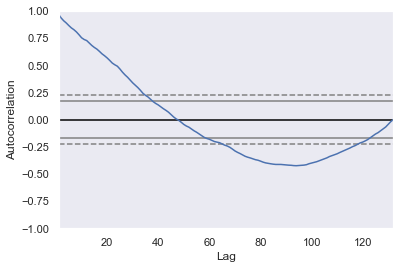

In [45]:
ax = autocorrelation_plot(data.Healthcare)
# plt.show()

fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig("../plots/plot007.png")

In [ ]:
# the actual data for this attribute looks much different than white noise

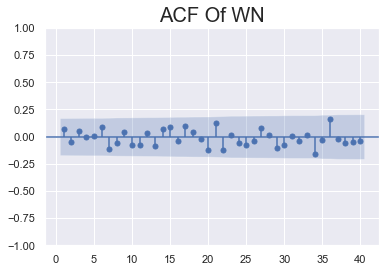

In [54]:
# reviewing the autocorrelation function for whitenoise
sgt.plot_acf(data.wn, zero = False, lags = 40)
plt.title("ACF Of WN",size=20)
# plt.show()

fig = ax.get_figure()
 
fig.patch.set_facecolor('white')
fig.savefig("../plots/plot008.png")

In [ ]:
# the values bounce around zero

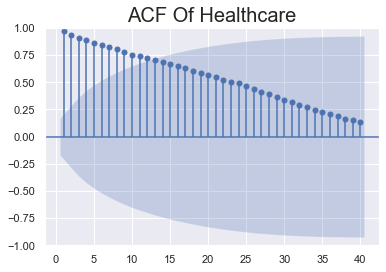

In [60]:
sgt.plot_acf(data.Healthcare, zero = False, lags = 40)
plt.title("ACF Of Healthcare",size=20)
plt.show()

fig = ax.get_figure()
 
fig.patch.set_facecolor('white')
fig.savefig("../plots/plot009.png")

In [ ]:
# the ACF for the healthcare plot is very different than whitenoise

### random walk

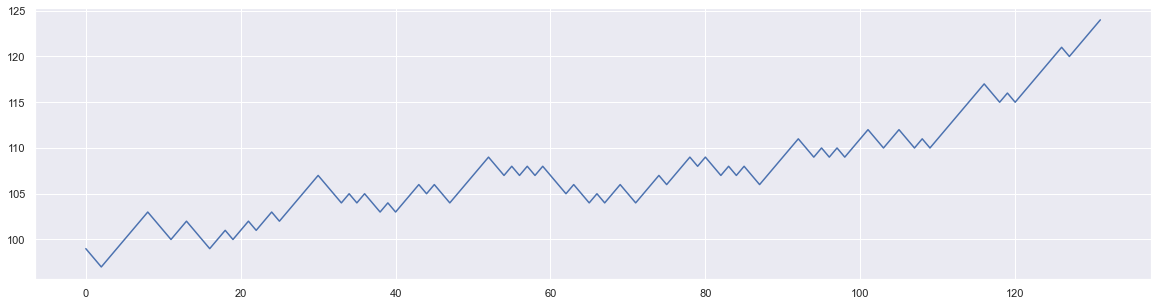

In [121]:
walk = [99]
noise1 = []
for i in range(1900):
    # Create random noise
    noise = -1 if np.random.random() < 0.5 else 1
    noise1.append(noise)
    walk.append(walk[-1] + noise)

plt.figure(figsize=(20,5))
plt.plot(walk[:132])

# re-ran these calcuations until we got a chart similar to the chart of the data

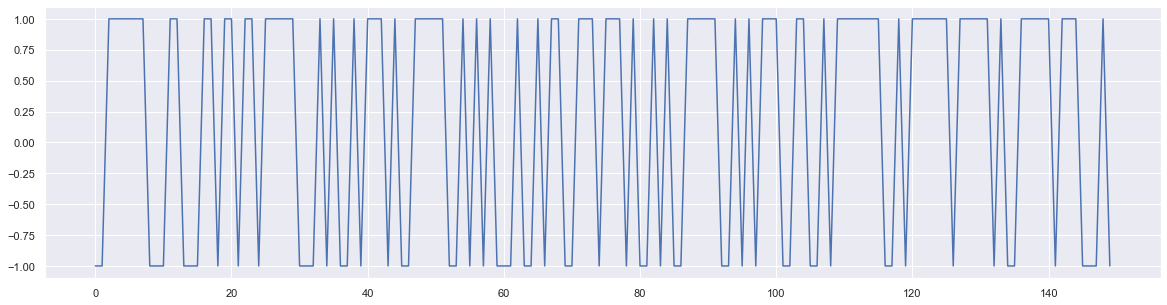

In [122]:
# plot the noise which was created at each point
plt.figure(figsize=(20,5))
plt.plot(noise1[:150])

In [125]:
# this is the white noise used, it si oscillating with no correlation

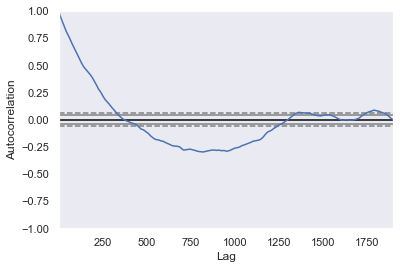

In [123]:
autocorrelation_plot(walk)
plt.show()

In [124]:
# the random walk charts look very similar to the original data charts implying that the data are random

## Stationarity

### Ad Fuller Test

In [ ]:
# a stationary time-series does not have a trend and fluctuates around a constant mean, also has a constant variance.  
# In other words, two time windows of the same width onb the data would have the same mean.
# the data here does not look stationary but we will do some tests

In [127]:
# Augmented Dickey fuller test for stationarity
# null hypothesis: the data is non-stationary  p > .05


# AD test for the white noise
sts.adfuller(data.wn)

(-10.776827324109114,
 2.308364039481538e-19,
 0,
 131,
 {'1%': -3.481281802271349,
  '5%': -2.883867891664528,
  '10%': -2.5786771965503177},
 2391.9185472122604)

In [128]:
# the 1% value is greater than the top volue (t-statistic)  then we can reject the null hypothesis and say the data is stationary.
# the p-value us less than .05 (2.3 * 10^-19)

# AD test for the data
sts.adfuller(data.Healthcare)

(0.6354247416388424,
 0.9884570085984412,
 13,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 1856.9782100198688)

In [ ]:
# the 1% value is less than the top volue (t-statistic)  then we cannot reject the null hypothesis and say the data is non-stationary.
# the p-value is .988



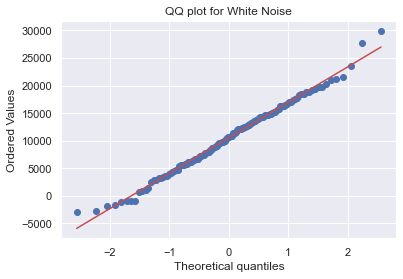

In [130]:
# The QQ plot for gausian test
scipy.stats.probplot(data.wn, plot=pylab)
plt.title("QQ plot for White Noise")
pylab.show()

In [ ]:
# the white noise is perfectly normal

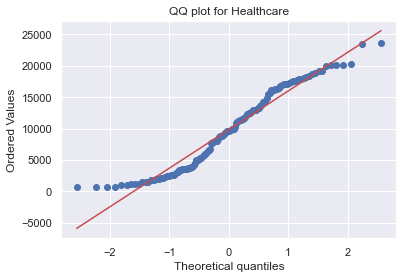

In [131]:
# The QQ plot
scipy.stats.probplot(data.Healthcare, plot=pylab)
plt.title("QQ plot for Healthcare")
pylab.show()

In [ ]:
# the actual data fluctuates around being normal which means it is not normaally distributed

### seasonality

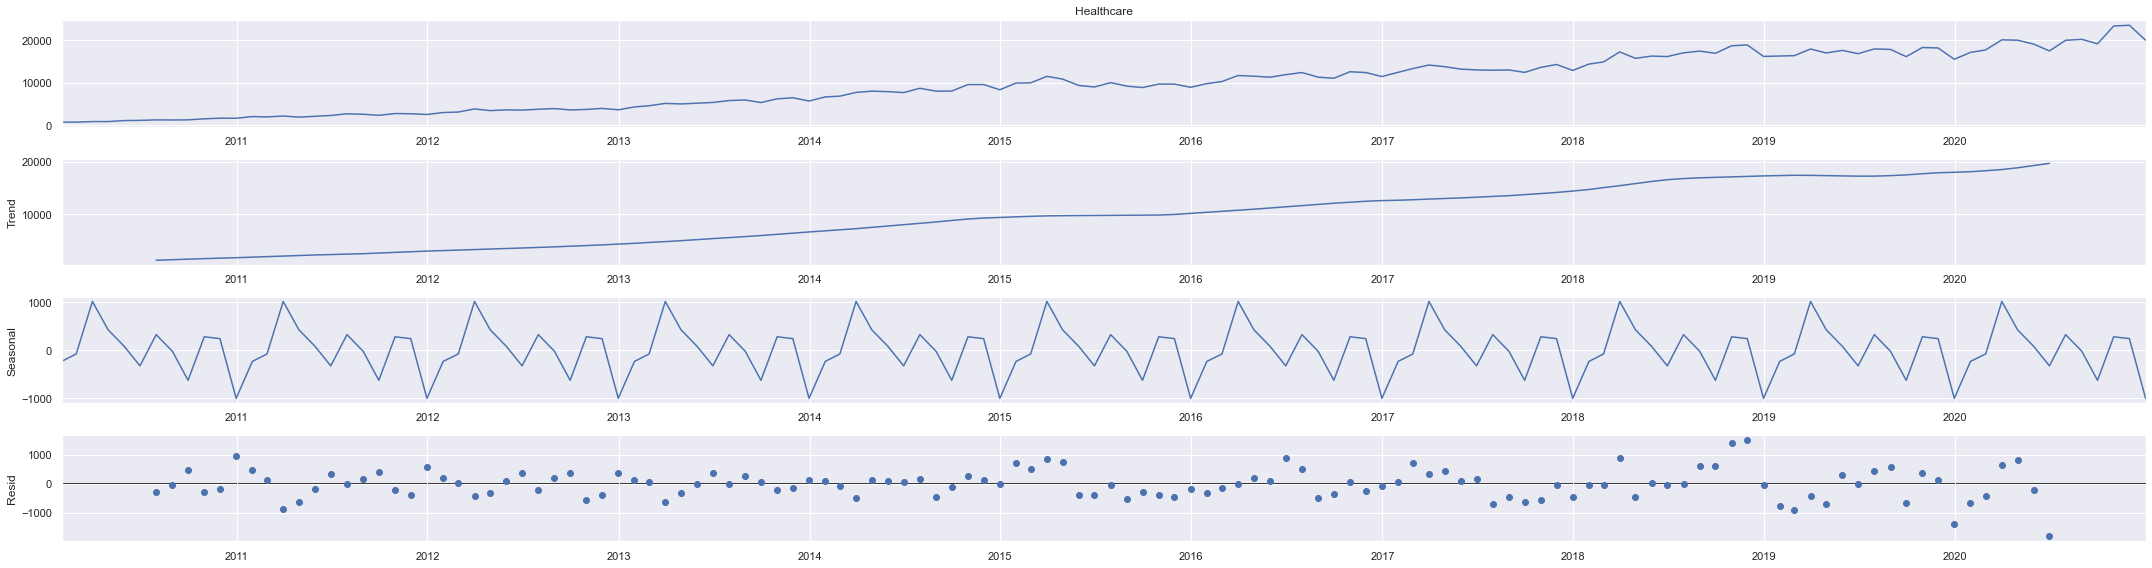

In [147]:
# Naive decomposition Additive
# observed = Trend + Sesonal + Residual
additive = seasonal_decompose(data.Healthcare, model="additive")
additive.plot()
plt.rcParams["figure.figsize"] = (30, 8)
plt.show()




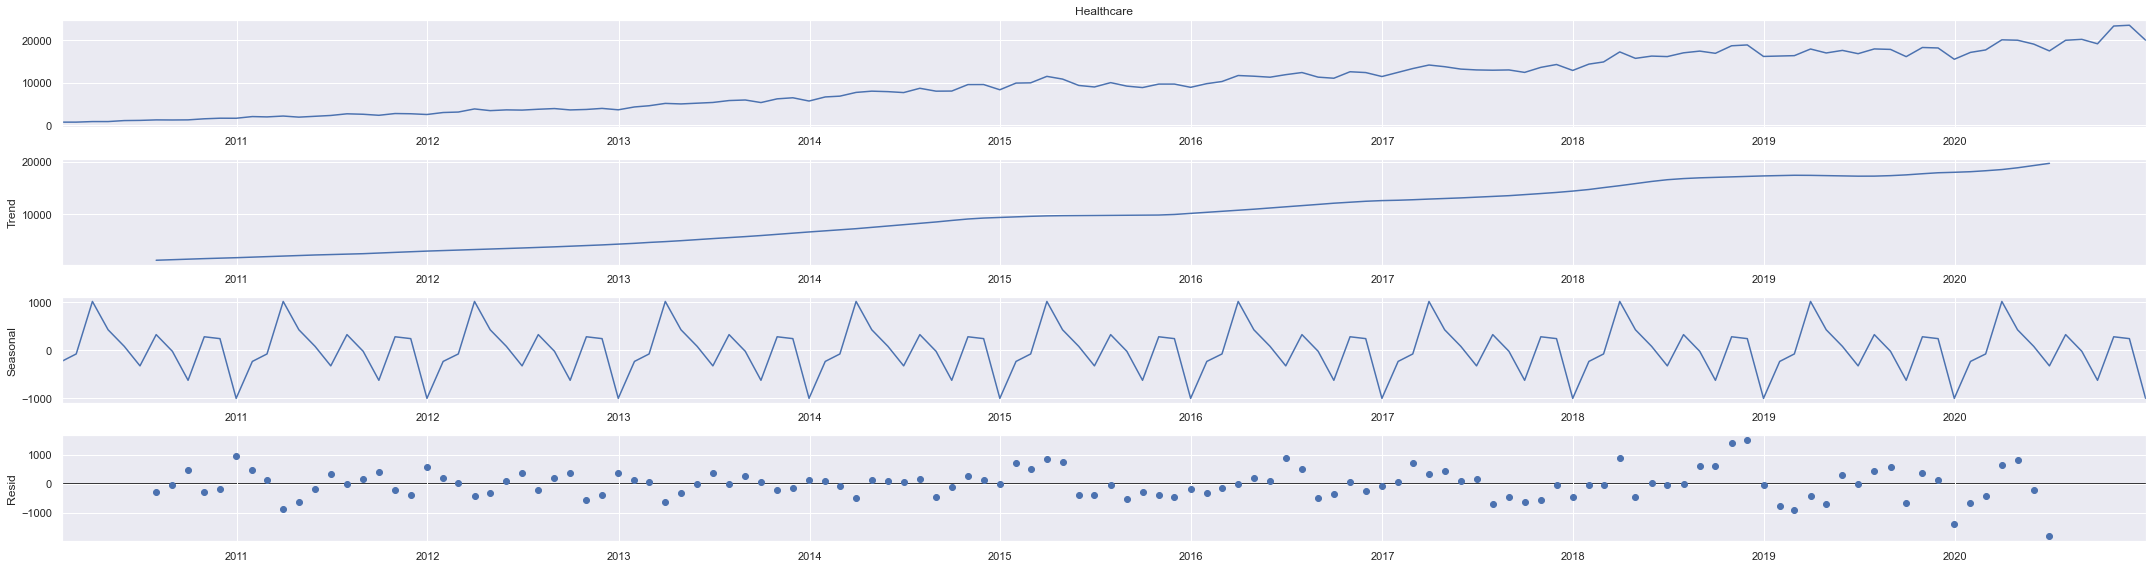

In [169]:
# Naive decomposition Additive
# observed = Trend + Sesonal + Residual
additive = seasonal_decompose(data.Healthcare, model="additive")
additive.plot()
plt.rcParams["figure.figsize"] = (30, 8)
# plt.show()

fig = plt.figure(1)
rect = fig.patch
rect.set_facecolor("white")
plt.savefig("../plots/plot010.png", facecolor=fig.get_facecolor())


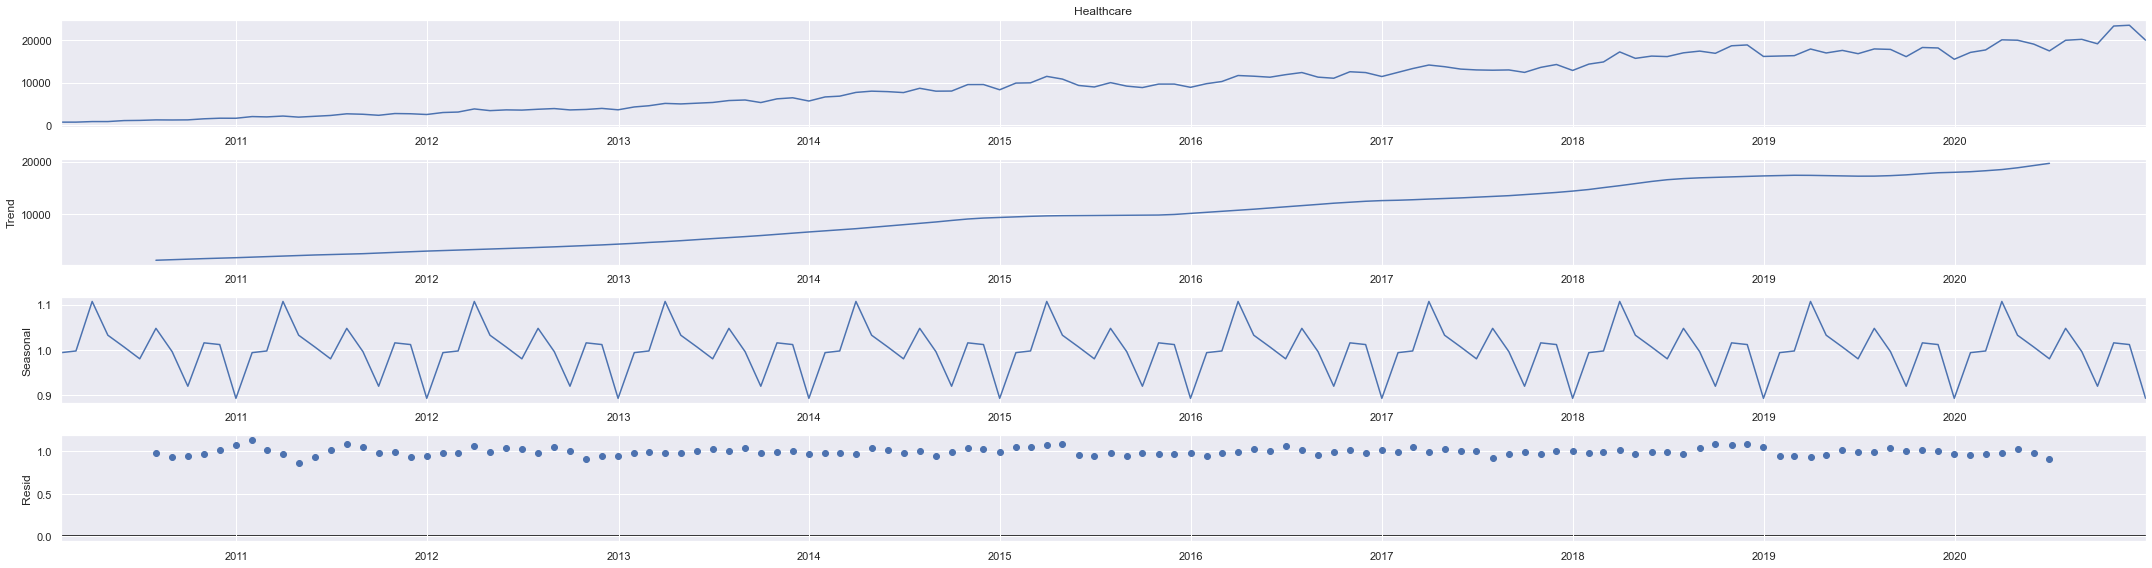

In [170]:
# Naive decomposition Multiplicative
# observed = Trend * Sesonal * Residual
multiplicative = seasonal_decompose(data.Healthcare, model="multiplicative")
plt.rcParams["figure.figsize"] = (30, 8)
multiplicative.plot()
plt.show()

## Holt Winter Exponential Smoothing 

In [149]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [151]:
hw_model = ExponentialSmoothing(data.Healthcare.tolist())
model_fit = hw_model.fit()

In [153]:
# make prediction
yhat = model_fit.predict(1, len(data)) 
#we are calling the model to predict all datapoints that are same as the dataset to see the model's performance

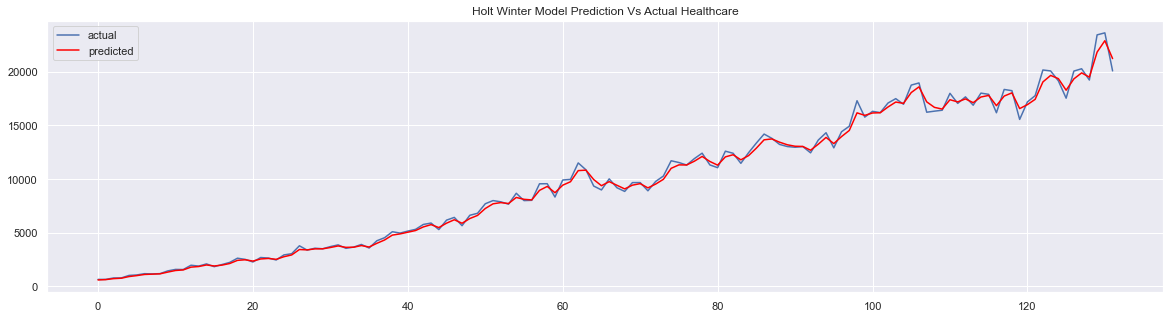

In [172]:
plt.figure(figsize=(20,5))
plt.plot(data.Healthcare.tolist())
plt.plot(yhat.tolist(), color='red')
plt.title("Holt Winter Model Prediction Vs Actual Healthcare")
plt.legend(["actual", "predicted"])
#plt.show()


fig = plt.figure(1)
rect = fig.patch
rect.set_facecolor("white")
plt.savefig("../plots/plot011.png", facecolor=fig.get_facecolor())



In [ ]:
# the smoothing function removed the rough edges of the original data so it can then be used for predictionss

## ARIMA

#### LLR TEST

In [174]:
# define a fucntion for LLR test
# checks whether a higher or lower p & q would be better for the model
def LLR_test(mod_1, mod_2, DF = 1):  # mod_1 is the simpler model and mod_2 is the more complex model
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)  # get the p attribute out of the chi-square
    return p


# p-value is less than 0.05 then model # 2 is more significant than model # 1

In [ ]:
# p is the number of autoregressive terms,
# d is the number of nonseasonal differences needed for stationarity (# of times to integrate the model)
# q is the number of lagged forecast errors in the prediction equation.

### ARIMA(1,1,1)

In [176]:
# Intgrating by 1 factor
data["delta_1_Healthcare"] = data.Healthcare.diff(1)  # the values are separated by one

data.delta_1_Healthcare  # take aa look at the data now

month
2010-01-31       NaN
2010-02-28       2.0
2010-03-31     133.0
2010-04-30       2.0
2010-05-31     235.0
               ...  
2020-08-31     216.0
2020-09-30   -1050.0
2020-10-31    4207.0
2020-11-30     188.0
2020-12-31   -3544.0
Freq: M, Name: delta_1_Healthcare, Length: 132, dtype: float64

In [177]:
# Check for stationarity
sts.adfuller(data.delta_1_Healthcare[1:])  # started after the first observation because it is NAN

(-3.444150447464898,
 0.0095427653303564,
 13,
 117,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 1838.875046179446)

In [ ]:
# the 1% value is greater than the top volue (t-statistic)  then we can reject the null hypothesis and say the data is stationary.
# the p-value us less than .05 

In [178]:

model_ar_1_i_1_ma_1 = ARIMA(data.Healthcare, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Healthcare   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1084.123
Date:                Sun, 27 Nov 2022   AIC                           2174.246
Time:                        15:50:27   BIC                           2182.872
Sample:                    01-31-2010   HQIC                          2177.751
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1975      0.204      0.968      0.333      -0.202       0.597
ma.L1         -0.5422      0.160     -3.395      0.001      -0.855      -0.229
sigma2      9.542e+05   8.36e+04     11.408      0.000     7.9e+05    1.12e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                54.20
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):              18.41   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# ar.L1  has a p value of 0.33 which is not significant for
# ma.L1 has a p value of 0.001 which is significant
# signma is the error term which is high here
# log likliehood is -1084 abd the AUC is 2174 which are not good.  The log likelihood should be higher and the AIC should be lower

In [ ]:
# the error should be like white noise in the model
# plotting the error to see what it looks like

### Residual of ARIMA(1,1,1)

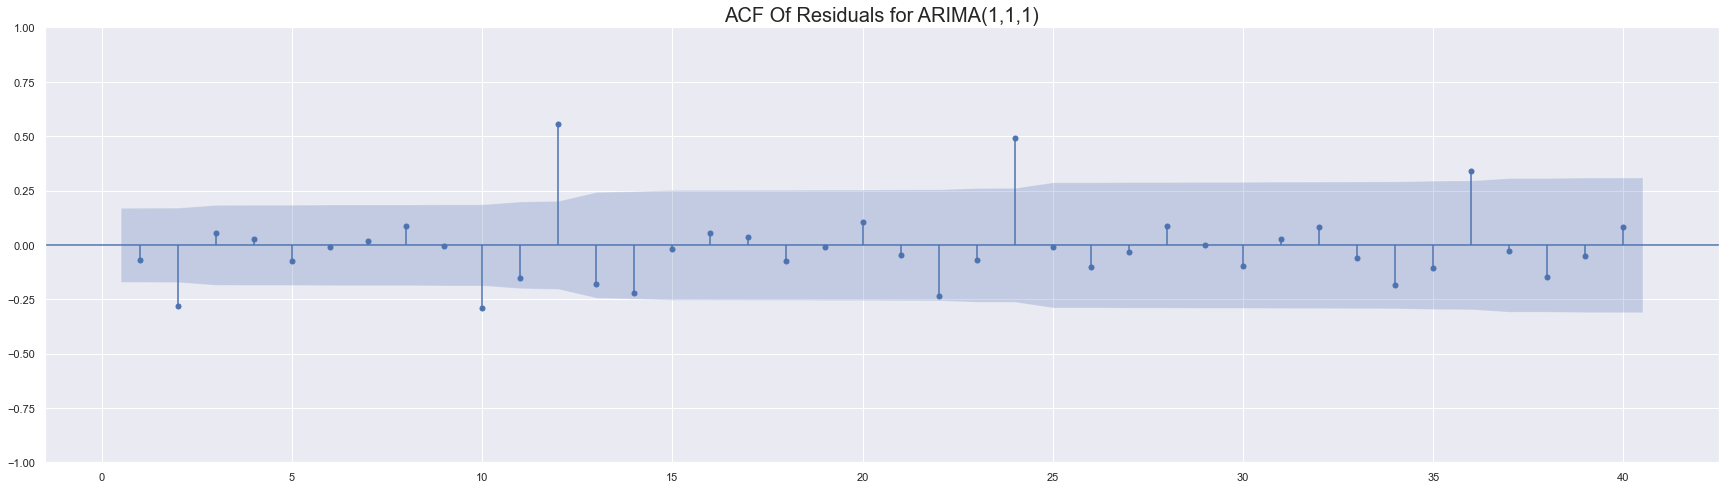

In [181]:
data['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(data.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

In [ ]:
# in reviewing the plot above we can see a few points as being significant

# Since 2nd Lag is significant, we need to take ARIMA(2,1,2) and its nested components/combinationss => (1,1,2), (2,1,1), (2,1,2)


### Higher Lag ARIMA

In [186]:
model_ar_1_i_1_ma_2 = ARIMA(data.Healthcare, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()

model_ar_2_i_1_ma_1 = ARIMA(data.Healthcare, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()

model_ar_2_i_1_ma_2 = ARIMA(data.Healthcare, order=(2,1,2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()

In [187]:
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(2,1,2):  \t LL = ", results_ar_2_i_1_ma_2.llf, "\t AIC = ", results_ar_2_i_1_ma_2.aic)

ARIMA(1,1,2):  	 LL =  -1081.8845342529676 	 AIC =  2171.769068505935
ARIMA(2,1,1):  	 LL =  -1080.0660363019056 	 AIC =  2168.132072603811
ARIMA(2,1,2):  	 LL =  -1079.9523094366514 	 AIC =  2169.9046188733028


In [ ]:
# the original LL was -1084 and the original AIC was 2174
# ARIMA (2,1,2) has the best LL while (2,1,1) has the best AIC

# we'll compare both

In [194]:
# Check with LLR test
print("\nLLR test p-value (1,1,1) and (2,1,2) = " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_2_i_1_ma_2, DF=2)))   # DF = abs((1+1+1) - (2+1+2))



LLR test p-value (1,1,1) and (2,1,2) = 0.015


In [ ]:
# discard model (1,1,1) because (2,1,2) is more significant

In [195]:

# Check with LLR test
print("\nLLR test p-value (1,1,1) and (2,1,1) = " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_2_i_1_ma_1, DF=1))) # DF = abs((1+1+1) - (2+1+1))
 


LLR test p-value (1,1,1) and (2,1,1) = 0.004


In [ ]:
# discard model (1,1,1) because (2,1,1) is more significant

In [196]:
 
# Check with LLR test
print("\nLLR test p-value (2,1,1) and (2,1,2) = " + str(LLR_test(model_ar_2_i_1_ma_1, model_ar_2_i_1_ma_2, DF=1))) # DF = abs((2+1+1) - (2+1+2))


LLR test p-value (2,1,1) and (2,1,2) = 0.633


In [ ]:
# discard model (2,1,2) because (2,1,1) is more significant